In [38]:
import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
parts = glob.glob('./results/*')

In [40]:
files = []
for part in parts:
    files.append(glob.glob(os.path.join(part, 'part-*')))

In [41]:
files = np.array(files).flatten()

In [42]:
data = []
for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            point = json.loads(line.replace("'", '"'))
            data.append(point)

In [43]:
df = pd.DataFrame(data, columns=['packID', 'price', 'time', 'latency'])

In [49]:
df['t'] = df['time'] - df['time'].min()

In [51]:
df = df.sort_values('t')
print(df.head(10))
print(df.describe())

     packID     price          time   latency         t
980       3   17908.0  1.633447e+09  1.027038  0.000000
981       2   11592.0  1.633447e+09  1.024310  0.000046
982       1    8102.0  1.633447e+09  1.029562  0.003630
983       0    4012.0  1.633447e+09  1.030174  0.003680
984       4   21970.0  1.633447e+09  1.026765  0.003681
1025      2   72999.0  1.633447e+09  0.983227  4.005316
1026      3   92168.0  1.633447e+09  0.983755  4.005342
1027      0   24719.0  1.633447e+09  0.985251  4.007378
1028      1   46696.0  1.633447e+09  0.985219  4.007405
1029      4  117700.0  1.633447e+09  0.985164  4.007406
               price          time      latency            t
count    1195.000000  1.195000e+03  1195.000000  1195.000000
mean    70152.520502  1.633447e+09     0.451685   525.727886
std     33431.789917  2.791037e+02     0.171154   279.103729
min      4012.000000  1.633447e+09     0.372722     0.000000
25%     46211.000000  1.633447e+09     0.405773   287.428019
50%     70284.0000

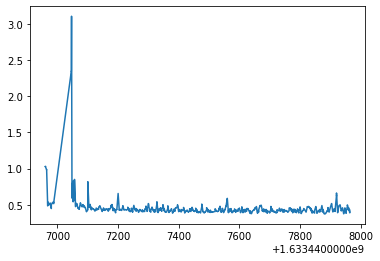

In [52]:
plt.plot(df['time'], df['latency'])